<a href="https://colab.research.google.com/github/ChiranjeeviVasant/IBM_DS/blob/main/Comparative_Analysis_of_Tesla_and_GameStop_Stock_Price_vs_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
pip install selenium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0


In [2]:
from bs4 import BeautifulSoup
import pandas as pd

html = """
<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr><td style="text-align:center">2025-03-31</td><td style="text-align:center">$19,335</td></tr>
<tr><td style="text-align:center">2024-12-31</td><td style="text-align:center">$25,707</td></tr>
<tr><td style="text-align:center">2024-09-30</td><td style="text-align:center">$25,182</td></tr>
<tr><td style="text-align:center">2024-06-30</td><td style="text-align:center">$25,500</td></tr>
<tr><td style="text-align:center">2024-03-31</td><td style="text-align:center">$21,301</td></tr>
<tr><td style="text-align:center">2023-12-31</td><td style="text-align:center">$25,167</td></tr>
</tbody>
</table>
"""
soup = BeautifulSoup(html, "html.parser")
table = soup.find("table")

tesla_revenue = pd.read_html(str(table))[0]
tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue.dropna(inplace=True)

tesla_revenue.tail()


/tmp/ipython-input-2-2117989512.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


,Date,Revenue
1,2024-12-31,25707
2,2024-09-30,25182
3,2024-06-30,25500
4,2024-03-31,21301
5,2023-12-31,25167


In [1]:
gme_data = yf.Ticker("GME").history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [2]:
from bs4 import BeautifulSoup
import pandas as pd

# Shortened GameStop revenue table
html = """
<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">GameStop Quarterly Revenue<br><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr><td style="text-align:center">2024-04-30</td><td style="text-align:center">$882</td></tr>
<tr><td style="text-align:center">2024-01-31</td><td style="text-align:center">$1,794</td></tr>
<tr><td style="text-align:center">2023-10-31</td><td style="text-align:center">$1,078</td></tr>
<tr><td style="text-align:center">2023-07-31</td><td style="text-align:center">$1,164</td></tr>
<tr><td style="text-align:center">2023-04-30</td><td style="text-align:center">$1,237</td></tr>
<tr><td style="text-align:center">2023-01-31</td><td style="text-align:center">$2,226</td></tr>
</tbody>
</table>
"""

# Parse and convert to DataFrame
soup = BeautifulSoup(html, "html.parser")
table = soup.find("table")
gme_revenue = pd.read_html(str(table))[0]
gme_revenue.columns = ["Date", "Revenue"]

# Clean revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
gme_revenue.dropna(inplace=True)

# Display last 5 rows
gme_revenue.tail()


/tmp/ipython-input-2-3505901648.py:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


,Date,Revenue
1,2024-01-31,1794
2,2023-10-31,1078
3,2023-07-31,1164
4,2023-04-30,1237
5,2023-01-31,2226


/tmp/ipython-input-5-3353265672.py:55: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


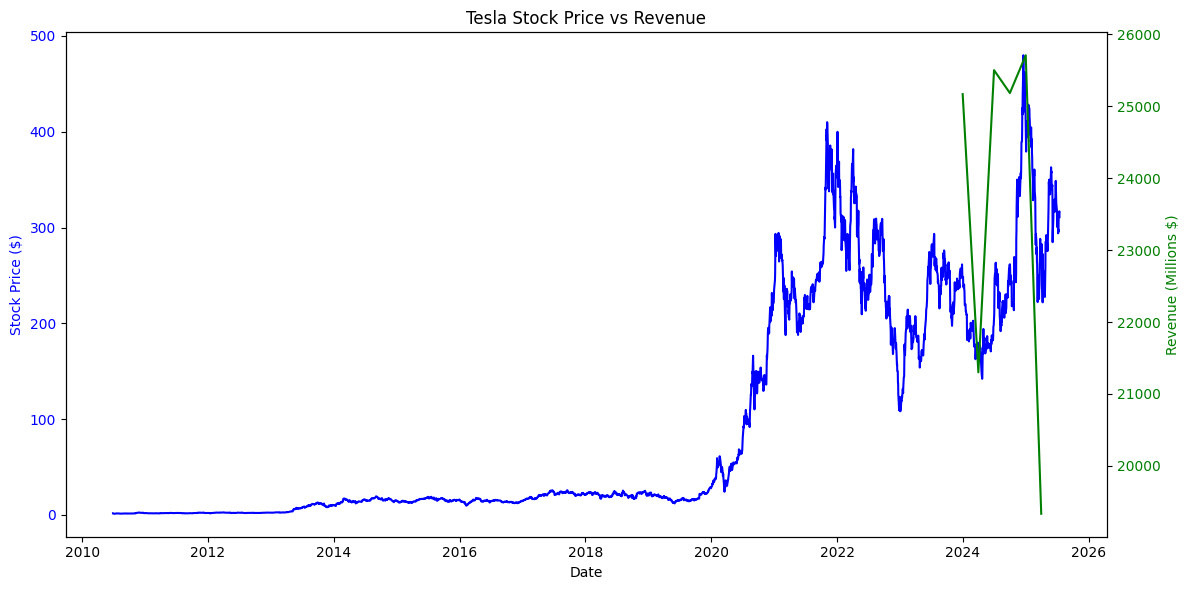

In [5]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla_data = yf.Ticker("TSLA").history(period="max")
tesla_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot stock closing price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot revenue on second y-axis
    ax2 = ax1.twinx()
    ax2.plot(pd.to_datetime(revenue_data['Date']), revenue_data['Revenue'].astype(float),
             color='green', label='Revenue')
    ax2.set_ylabel('Revenue (Millions $)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title(f"{stock_name} Stock Price vs Revenue")
    fig.tight_layout()
    plt.show()

from bs4 import BeautifulSoup

# Short version of Tesla Revenue HTML
html = """
<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr><td style="text-align:center">2025-03-31</td><td style="text-align:center">$19,335</td></tr>
<tr><td style="text-align:center">2024-12-31</td><td style="text-align:center">$25,707</td></tr>
<tr><td style="text-align:center">2024-09-30</td><td style="text-align:center">$25,182</td></tr>
<tr><td style="text-align:center">2024-06-30</td><td style="text-align:center">$25,500</td></tr>
<tr><td style="text-align:center">2024-03-31</td><td style="text-align:center">$21,301</td></tr>
<tr><td style="text-align:center">2023-12-31</td><td style="text-align:center">$25,167</td></tr>
</tbody>
</table>
"""

# Parse with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
table = soup.find("table")

# Convert to DataFrame
tesla_revenue = pd.read_html(str(table))[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue.dropna(inplace=True)

# Call function
make_graph(tesla_data, tesla_revenue, "Tesla")


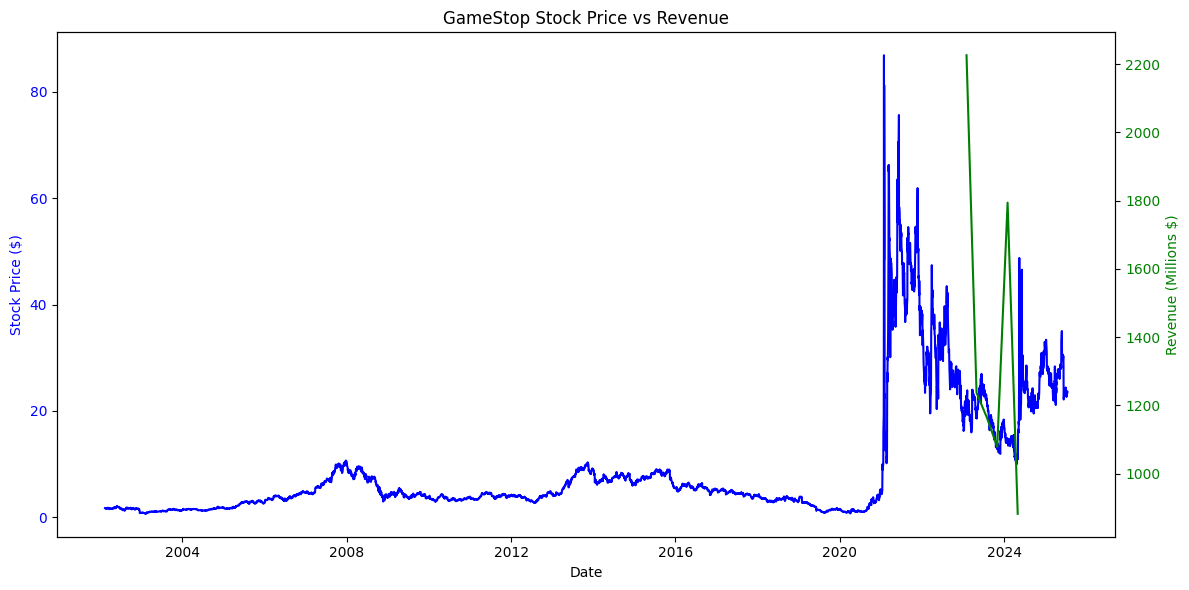

In [6]:
# Call the same function for GameStop
make_graph(gme_data, gme_revenue, "GameStop")
